# Explanatory Analysis

Telling stories with data follows these steps:

- Start with a Question
- Repetition is a Good Thing
- Highlight the Answer
- Call Your Audience To Action

## Polishing Plots
- Choose an appropriate plot
depend on the number of variables and their types: nominal, ordinal, discrete numeric, or continuous. Choice of plot also depends on the specific relationship that you want to convey.

For example, whether you choose a violin plot, box plot, or adapted bar chart depends on how much data you have and whether distributions are significant or important. 

You'll be more likely to use a violin plot if you have a lot of data and the distributions are meaningful, and more inclined to use a box plot or bar chart if you have less data, or the distributions are less reliable.

- Choose appropriate encodings

For example, if you have three numeric variables, you shouldn't just assign x-position, y-position, and color encodings randomly.

In many cases, the two variables that are most important should take the positional encodings; if one represents an outcome or dependent variable, then it should be plotted on the y-axis.

In other cases, it makes sense to plot the dependent measure with color, as though you are taking a top-down view of the plane defined by the two independent measures plotted on the axes.

- Pay attention to design integrity
When setting up your plotting parameters, remember the design principles.

- Make sure that you minimize chart junk and maximize the data-ink ratio, as far as it maintains good interpretability of the data. 
When deciding whether or not to add non-positional encodings, make sure that they are meaningful. 

For example, using color in a frequency bar chart may not be necessary on its own, but will be useful if those colors are used again later in the same presentation, matched with their original groups.

By the same token, avoid using the same color scheme for different variables to minimize the chance of reader confusion.

- You should also ensure that your plot avoids lie factors as much as possible.

If you have a bar chart or histogram, it is best to anchor them to a 0 baseline. If you're employing a scale transformation, signal this clearly in the title, axis labels, and tick marks.

- Label axes and choose appropriate tick marks
For your positional axes, make sure you include axis labels. When you add an axis label, make sure you also provide the units of measurement, if applicable (e.g., stating "Height (cm)" rather than just "Height").

- As for tick marks, you should include at least three tick marks on each axis. 
This is especially important for data that has been transformed: you want enough tick marks so that the scale of the data can be communicated there. If your values are very large or very small numbers, consider using abbreviations to relabel the ticks (e.g., use "250K" instead of "250000").

- Provide legends for non-positional variables
Make sure that you add a legend for variables not depicted on the axes of your plot. For color encoding, you can add a color bar to the side of the plot. The most important new thing here is that you provide a descriptive label to your legend or color bar, just as you would the axes of your plot.

- Title your plot and include descriptive comments
Finally, make sure that you provide a descriptive title to your plot. If this is a key plot that presents important findings to others, aim to create a title that draws attention to those main points, rather than just state what variables are plotted.

- Also, realize that while a visualization might be the core mechanism by which you convey findings, it need not stand alone.
Comments in the text below or surrounding the plot can provide valuable context to help the reader understand your message, or reinforce the main points that they should have gotten.

# Using Matplotlib to Polish Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Example 1

In [4]:
fuel_econ = pd.read_csv('fuel-econ.csv')

In [5]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

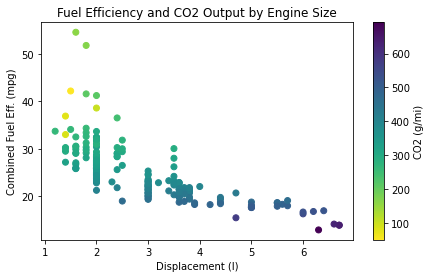

In [6]:
plt.figure(figsize = [7,4])
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2',
            cmap = 'viridis_r')
plt.title('Fuel Efficiency and CO2 Output by Engine Size')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

Note how the units of each feature being plotted is given in parentheses in each label.

## Example 2

In [8]:
pokemon = pd.read_csv('pokemon.csv')

In [9]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

In [12]:
# set up a dictionary to map types to colors
colrs = {'fairy': '#ee99ac', 'dragon': '#7038f8'}

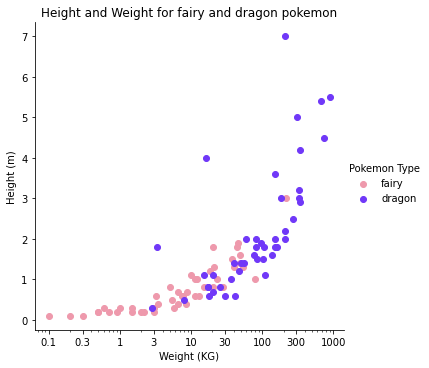

In [17]:
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', height = 5,palette=colrs)
g.map(plt.scatter, 'weight','height')

# X axis
g.set(xscale = 'log') # need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)

#labels
g.add_legend(title= 'Pokemon Type') 
g.set_xlabels('Weight (KG)')
g.set_ylabels('Height (m)')
plt.title('Height and Weight for fairy and dragon pokemon');

Each visualization is based off a single `Figure`, which contains one or more `Axes`, and each Axes houses elements like `points`, `lines`, and `boxes` that depict the plotted `data`. Understanding and making use of this structure will open up our ability to polish  visualizations. Each function below is linked to which object type it is associated with.

`figure` (Figure): Used to create a new figure. We'll use this first to initialize the figure, most often using the `figsize` parameter to set the figure dimensions.

`xlabel` and `ylabel` (Axes): Used for setting axis labels.<br>
`xticks` and `yticks` (Axes): Used for setting tick marks.

`legend` (Axes): Used to create and customize a legend. One key parameter to use is `title`, which allows us to label what feature is being depicted in the legend. We might also need to make use of the `loc` and `ncol` parameters to move and shape the legend if it gets placed in an awkward location by default.

`colorbar` (Axes): Used to add a colorbar to a plot. Use the `label` parameter to set the label on a colorbar.

`title`: Used for setting axis titles.

`suptitle` (Figure): Used for setting figure titles. The main difference between suptitle and title is that the former sets a title for the Figure as a whole, and the latter for only a single Axes. This is an important distinction: if we're using `faceting` or `subplotting`, we'll want to use `suptitle` to set a title for the figure as a whole.

# Creating a Slide Deck with Jupyter

Jupyter notebooks include a tool, `nbconvert`, that can export notebooks in an HTML slides format. [Intersting Examples](https://revealjs.com/) in  `reveal.js`, the library that is behind the nbconvert slide functionality.

It's a good idea to create a new notebook that is separate from your original, exploratory, work. This way, your explanatory work will be focused, and there will be fewer elements to categorize. 

To start, you need to categorize the type of slide element that each cell will correspond with. From the menu bar, select `View > Cell Toolbar > Slideshow`. You'll see a drop down appear in the upper right hand corner of each cell, from which you can assign slide element types.

Cells that we don't want users to see should be in the `Skip` or `Notes` types. Skip-type cells will never show up in a slide flow, while Notes cells can only be seen by the presenter in a speaker notes window.

Improtant to make sure that all of our code cells have been run and produce the output that we want to show. `nbconvert` will only export elements of the notebook as-is, and won't run the notebook cells as is. 

It is recommended that er use the `Kernel > Restart & Run All` menu option to do a clean run-through of all of our cells as a final preparatory action.

## On the command line
We can render the notebook as slides using the following expression as a base.

`jupyter nbconvert presentation.ipynb --to slides`


However, it's likely that we'll want to add **additional options** to the nbconvert call to make the slides look cleaner and to make serving them easier. By default, code cell inputs and outputs are both rendered in the slides. More likely than not, we'll want to hide the code in our presentation so that all attention can be put on the visualizations and text. 

To do this, we can specify a template file using the `--template option`. The template file available at [this link](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/March/5abe98f3_output-toggle/output-toggle.tpl), **will hide code cells from nbconvert.** Save the file in the same folder of the notebook, and  use `--template output_toggle`

## Additionally
Running the base expression will **not automatically open up the slide deck** for viewing. In order to serve the slides:
- we would need to install a local copy of `reveal.js`: [Installation documentation](https://github.com/hakimel/reveal.js#installation)
- make sure that our HTML slides point to the library correctly; using `--reveal-prefix` option.
- and then start a local http server, e.g., via `python -m http.server`.

## Alternatively
We  can add the `--post serve` option to our expression to make use of a public, online version of reveal.js, start up a server, and immediately open a tab in your web browser with the slide deck ready to navigate. 

So the command is `jupyter nbconvert presentation.ipynb --to slides --post serve --template output_toggle` Now, it will hide the code input and shows only the output, **unless I click on the output, code will be revealed**

## Dark mode
First, `conda install -c conda-forge jupyterthemes`<br>
Then change mode, `jt -t chesterish`<br>
Finally, reload the page. (From command line)

The docs and source code are here: https://github.com/dunovank/jupyter-themes


If you're at home with HTML, css, and web engine templating, then you have a lot of potential room for customizing your slide deck work. Otherwise, you can just use an expression like the following to get a basic slide deck up and running.

`jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl
--post serve`

# Getting and Using Feedback

When putting together a report or presentation to communicate results to others, it never hurts to get outside eyes on your work to make sure that your findings are conveyed clearly. Asking colleagues, friends, or family to provide feedback can be a good step to making sure that the story that you wish to tell hits its mark.

When you present your work to the reader, let them go through the work for themselves first. Then, follow up with them to check whether or not their conclusions match what you were hoping to convey. The following questions might be good starters; be sure to follow up or come up with your own questions:

- What do you notice about each visualization?
- What questions do you have about the data?
- What relationships do you notice?
- What do you think is the main takeaway from the report / presentation?
- Is there anything that you don’t understand from the plots?

Use the feedback that you get from your reader to iterate on and improve on your designs. The alternative perspective that they have may reveal things that you didn't consider or points that require further clarification.